# Exploratory Data Analysis

In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import warnings  
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [58]:
import pandas as pd
df=pd.read_csv('./data/CustomerData_LeadGenerator.csv', index_col='fakeID')
df.head()

,b_specialisation_i,b_specialisation_h,b_specialisation_g,b_specialisation_f,b_specialisation_e,b_specialisation_d,b_specialisation_c,b_specialisation_b,b_specialisation_a,b_specialisation_j,...,q_5th Quint by Total HH,q_2017 Purchasing Power: Per Capita,q_2017 Total Population,"q_2017 Pop 15+/Edu: University, Fachhochschule",q_Uni by Total Pop,q_2017 Personal Care: Per Capita,q_2017 Medical Products: Per Capita,q_2017 Personal Effects: Per Capita,b_in_kontakt_gewesen,b_gekauft_gesamt
fakeID,,,,,,,,,,,,,,,,,,,,,
1069_7334,0,0,0,0,0,0,0,0,0,1,...,0.186735,23730.35,2194057,324656,0.147971,593.19,326.28,235.75,1,1
328_2350,0,0,0,1,1,1,0,0,0,0,...,0.179848,23343.26,1966798,281130,0.142938,588.54,320.36,230.66,1,1
865_6285,0,0,0,1,0,1,0,0,0,1,...,0.184935,23674.18,2149624,320326,0.149015,592.88,325.57,234.82,1,1
47_307,0,1,1,0,0,0,0,0,0,0,...,0.184523,23572.26,2161445,310981,0.143876,590.84,324.06,233.81,1,0
342_2513,0,0,0,0,0,1,0,0,0,1,...,0.189871,23821.63,2302959,334940,0.145439,593.56,327.75,237.41,1,1


## Data Cleaning
Let's have a look at the data types for all of the columns we've read in.

In [59]:
df.dtypes

b_specialisation_i                                  int64
b_specialisation_h                                  int64
b_specialisation_g                                  int64
b_specialisation_f                                  int64
b_specialisation_e                                  int64
b_specialisation_d                                  int64
b_specialisation_c                                  int64
b_specialisation_b                                  int64
b_specialisation_a                                  int64
b_specialisation_j                                  int64
q_OpeningDays                                       int64
q_OpeningHours                                     object
q_2017 Average Household Size                     float64
q_2017 Total Households                             int64
q_2017 HHs: 5th Quintile (68.759 and above)         int64
q_5th Quint by Total HH                           float64
q_2017 Purchasing Power: Per Capita               float64
q_2017 Total P

The column **q_OpeningHours** is being shown as *object* type, but looking at the data it seems like it should be numeric. This implies there are some non-numeric values in that column. Let's convert that column to *numeric*, setting any invalid values to *NaN*. Then we can drop any rows containing *NaN*.

In [60]:
df['q_OpeningHours'] = pd.to_numeric(df['q_OpeningHours'], errors='coerce')
rows_before = df.shape[0]
df.dropna(inplace=True)
print('dropped {} row(s)'.format(rows_before - df.shape[0]))

dropped 1 row(s)


Let's check the column type for **q_OpeningHours** to make sure it has become a numeric one

In [61]:
df['q_OpeningHours'].dtype

dtype('float64')

Let's rename some of the columns to make them easier to analyse.

In [62]:
df = df.rename(columns={"b_gekauft_gesamt": "converted", "b_in_kontakt_gewesen": "contacted",
                       "q_OpeningHours": "HoursOpenPerWeek", "q_OpeningDays": "DaysOpenPerWeek" })

## Missing Values
Let's check for any missing values in our data

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3772 entries, 1069_7334 to 0_27
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   b_specialisation_i                              3772 non-null   int64  
 1   b_specialisation_h                              3772 non-null   int64  
 2   b_specialisation_g                              3772 non-null   int64  
 3   b_specialisation_f                              3772 non-null   int64  
 4   b_specialisation_e                              3772 non-null   int64  
 5   b_specialisation_d                              3772 non-null   int64  
 6   b_specialisation_c                              3772 non-null   int64  
 7   b_specialisation_b                              3772 non-null   int64  
 8   b_specialisation_a                              3772 non-null   int64  
 9   b_specialisation_j                    

Looks like there are no null entries so we don't need to cater for them.

In [64]:
numeric_cols = ['DaysOpenPerWeek','HoursOpenPerWeek','q_2017 Average Household Size',
                'q_2017 Average Household Size', 'q_2017 Total Households', 'q_2017 HHs: 5th Quintile (68.759 and above)',
                'q_5th Quint by Total HH', 'q_2017 Purchasing Power: Per Capita', 'q_2017 Total Population', 
                'q_2017 Pop 15+/Edu: University, Fachhochschule', 'q_Uni by Total Pop', 'q_2017 Personal Care: Per Capita',
                'q_2017 Medical Products: Per Capita', 'q_2017 Personal Effects: Per Capita']

In [65]:
specialisation_cols = ['b_specialisation_a', 'b_specialisation_b', 'b_specialisation_c', 'b_specialisation_d',
                      'b_specialisation_e', 'b_specialisation_f', 'b_specialisation_g', 'b_specialisation_h',
                      'b_specialisation_i', 'b_specialisation_j']

In [66]:
target_col = ['converted']

## Data Statistics
Let's get some statistics for the numeric columns

In [67]:
df[numeric_cols].describe()

,DaysOpenPerWeek,HoursOpenPerWeek,q_2017 Average Household Size,q_2017 Average Household Size,q_2017 Total Households,q_2017 HHs: 5th Quintile (68.759 and above),q_5th Quint by Total HH,q_2017 Purchasing Power: Per Capita,q_2017 Total Population,"q_2017 Pop 15+/Edu: University, Fachhochschule",q_Uni by Total Pop,q_2017 Personal Care: Per Capita,q_2017 Medical Products: Per Capita,q_2017 Personal Effects: Per Capita
count,3772.000000,3772.000000,3772.000000,3772.000000,3.772000e+03,3772.000000,3772.000000,3772.000000,3.772000e+03,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,3.230382,18.618704,2.242259,2.242259,3.872178e+05,73543.980647,0.197422,23170.506683,8.253789e+05,111196.887593,0.101724,574.242293,326.438089,234.848460
std,2.070541,13.041684,0.153146,0.153146,4.115536e+05,75519.455588,0.024975,1148.096205,8.564363e+05,131810.233785,0.039746,22.967274,11.136659,11.019623
min,0.000000,0.000000,2.000000,2.000000,1.718000e+03,316.000000,0.100814,19171.140000,3.807000e+03,172.000000,0.027974,490.390000,270.110000,196.450000
25%,0.000000,0.000000,2.100000,2.100000,7.569700e+04,15440.250000,0.184565,22662.050000,1.780572e+05,11428.000000,0.063091,560.130000,322.380000,231.310000
50%,4.000000,21.000000,2.200000,2.200000,1.537120e+05,34150.000000,0.195914,23627.225000,3.417630e+05,39268.500000,0.101590,583.985000,325.855000,235.290000
75%,5.000000,28.000000,2.400000,2.400000,9.647610e+05,173852.750000,0.213675,23839.605000,2.020079e+06,298839.000000,0.145622,592.512500,331.930000,238.000000
max,7.000000,68.000000,2.900000,2.900000,1.113261e+06,212126.000000,0.269397,26008.530000,2.350279e+06,337338.000000,0.170786,610.140000,363.230000,274.140000


### Conversion Rate

In [68]:
conversion_rate = (sum(df['converted'])/len(df['converted'].index))*100
print(f'Conversion rate: {conversion_rate:.1f}%')

Conversion rate: 1.5%


That's a really low conversion rate.

## Correlation Matrix
Let's calculate a correlation matrix for the data.

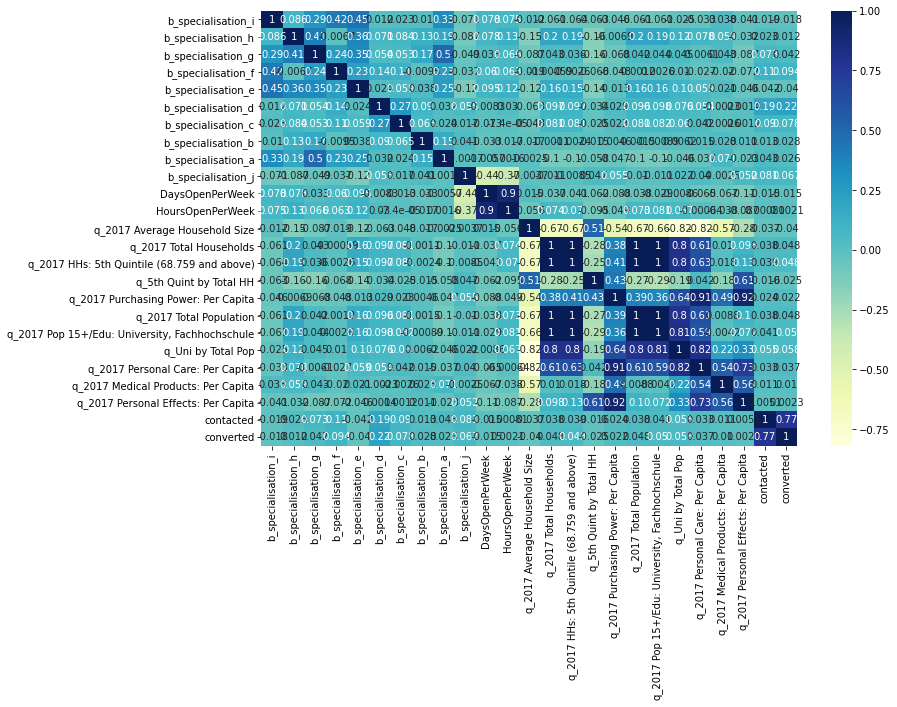

In [69]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

We only really need to look at the upper triangle of this matrix, since it is a reflection of the lower triangle. The diagonal is always 1. Let's extract this and then show it.

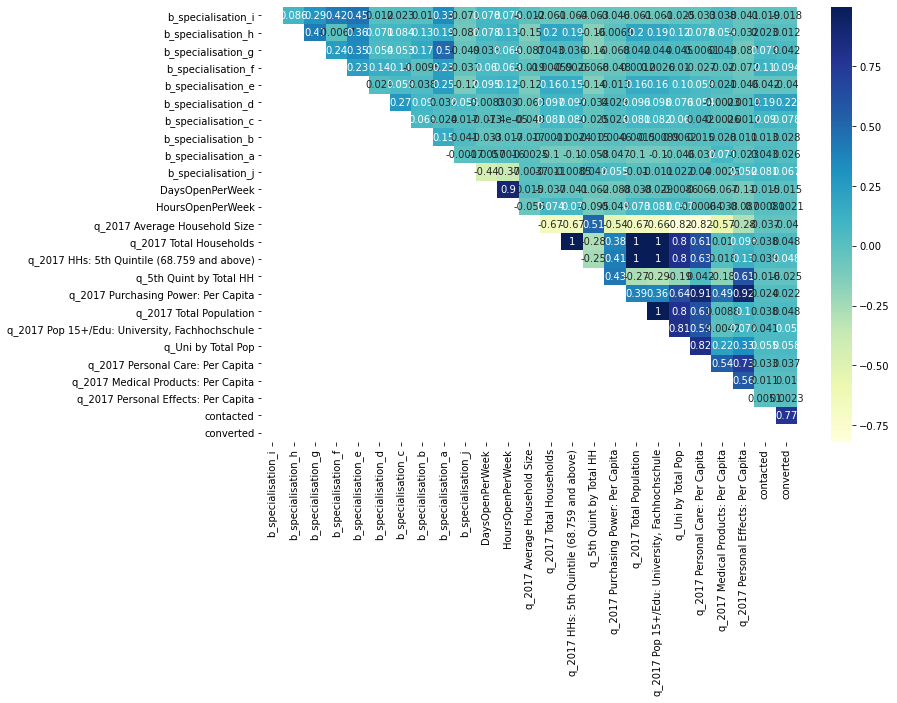

In [70]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
plt.figure(figsize=(12,8))
sns.heatmap(upper_tri, cmap="YlGnBu", annot=True)
plt.show()

You can see that there are some highly correlated columns. Let's drop those that have a correlation value greater than 0.9.

In [71]:
highly_correlated_cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(highly_correlated_cols)

['q_2017 HHs: 5th Quintile (68.759 and above)', 'q_2017 Total Population', 'q_2017 Pop 15+/Edu: University, Fachhochschule', 'q_2017 Personal Care: Per Capita', 'q_2017 Personal Effects: Per Capita']


In [72]:
df = df.drop(highly_correlated_cols, axis=1)

Having dropped all the highly correlated rows, lets look at the correlation matrix again to see our final features:

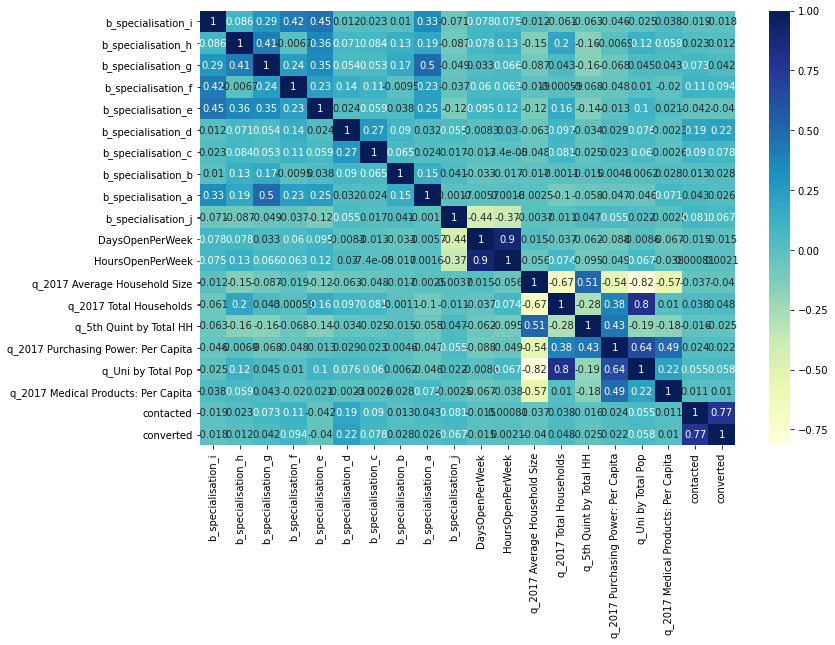

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

Looking at this correlation matrix we can see that **contacted** has an important correlation to **converted**. We can show this in a different way by showing the counts.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

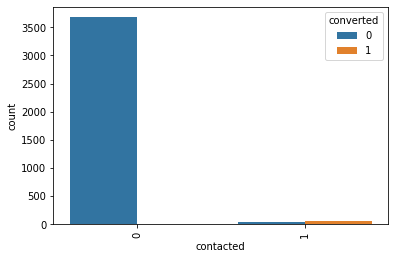

In [74]:
sns.countplot(x="contacted", hue="converted", data=df)
plt.xticks(rotation = 90)

Clearly this is an important factor. There isn't a single sale that didn't happen without a contact.